## IRIS FLOWER CLASSIFICATION
dataset: https://www.kaggle.com/datasets/arshid/iris-flower-dataset

In [1]:
# import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

/home/polashi/.local/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
iris = pd.read_csv("/media/polashi/Study/Codsoft intrenship/Iris Flower Dataset/IRIS.csv", encoding='latin-1')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [17]:
# Checking the rows and columns
iris.shape



(150, 5)

In [24]:
iris.replace({'species':{'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}}, inplace=True)

Shape of your Data Set loaded: (150, 5)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
  Printing upto 30 columns (max) in each category:
    Numeric Columns : ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
    Integer-Categorical Columns: []
    String-Categorical Columns: []
    Factor-Categorical Columns: []
    String-Boolean Columns: []
    Numeric-Boolean Columns: []
    Discrete String Columns: []
    NLP text Columns: []
    Date Time Columns: []
    ID Columns: []
    Columns that will not be considered in modeling: []
    4 Predictors classified...
        No variables removed since no ID or low-information variables found in data set

################ Multi_Classification problem #####################
   Colum

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
sepal_length,float64,0.000000,NA,4.300000,7.900000,No issue
sepal_width,float64,0.000000,NA,2.000000,4.400000,Column has 4 outliers greater than upper bound (4.05) or lower than lower bound(2.05). Cap them or remove them.
petal_length,float64,0.000000,NA,1.000000,6.900000,Column has a high correlation with ['sepal_length']. Consider dropping one of them.
petal_width,float64,0.000000,NA,0.100000,2.500000,"Column has a high correlation with ['sepal_length', 'petal_length']. Consider dropping one of them."
species,int64,0.000000,2,0.000000,2.000000,Target column


Total Number of Scatter Plots = 10
All Plots are saved in ./AutoViz_Plots/species
Time to run AutoViz = 2 seconds 


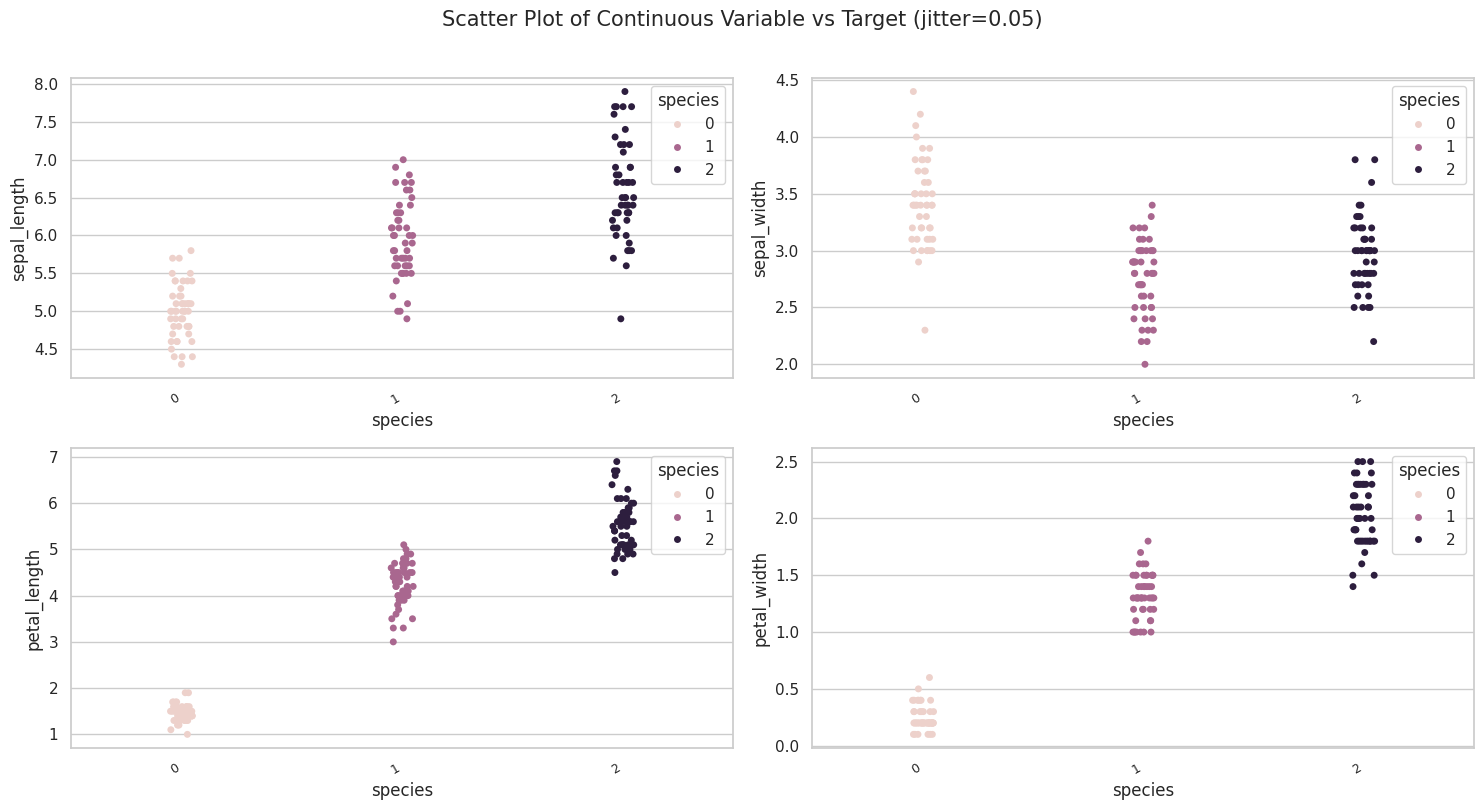

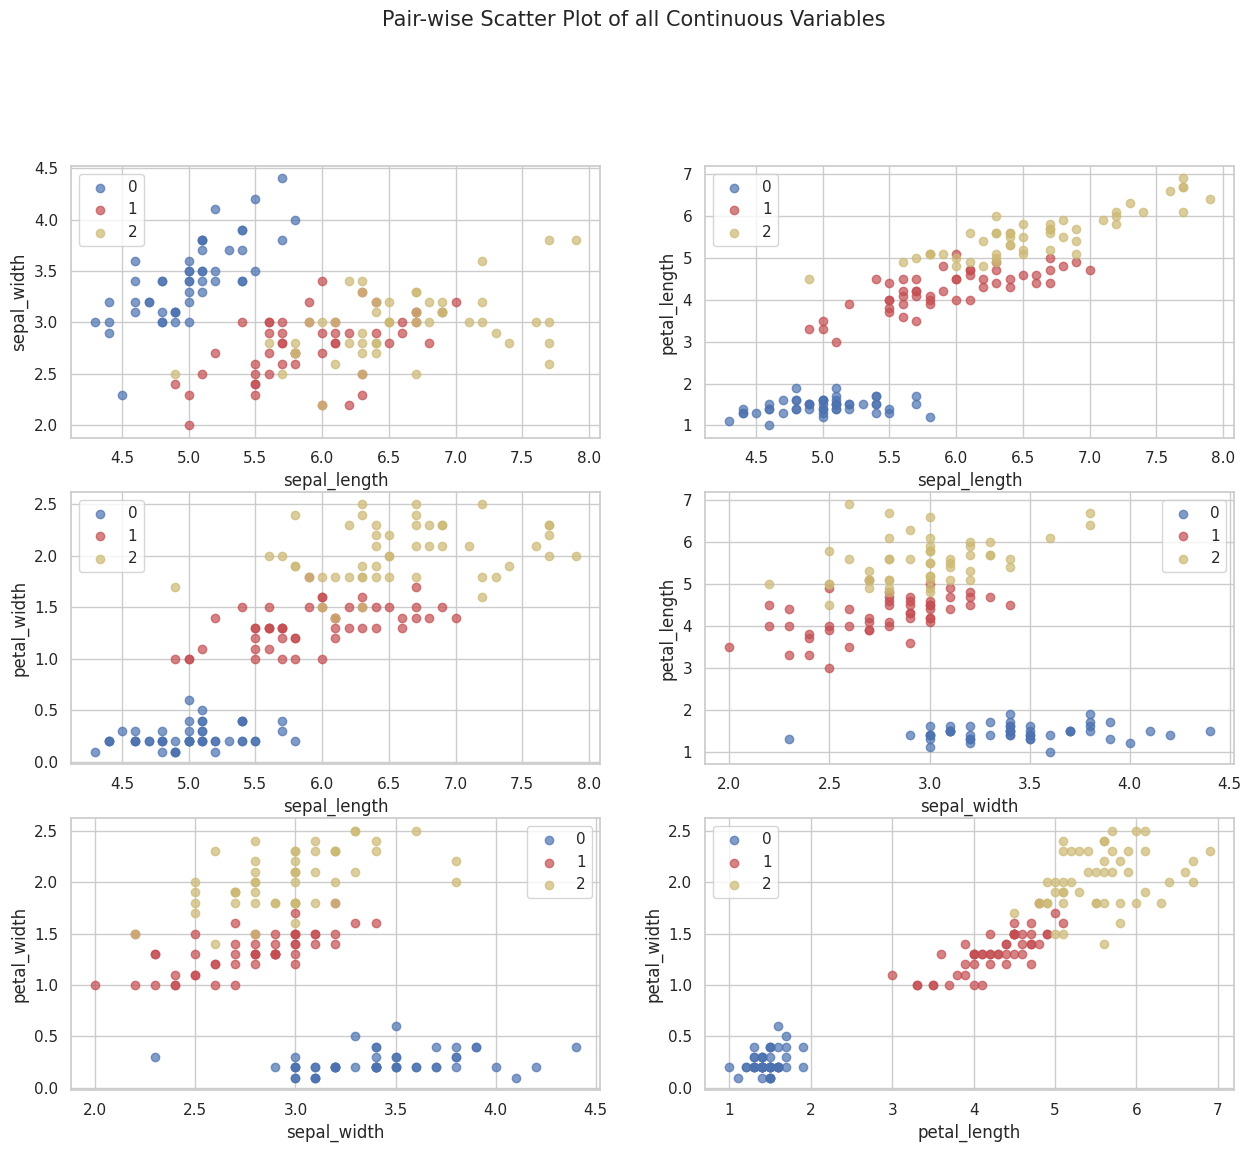

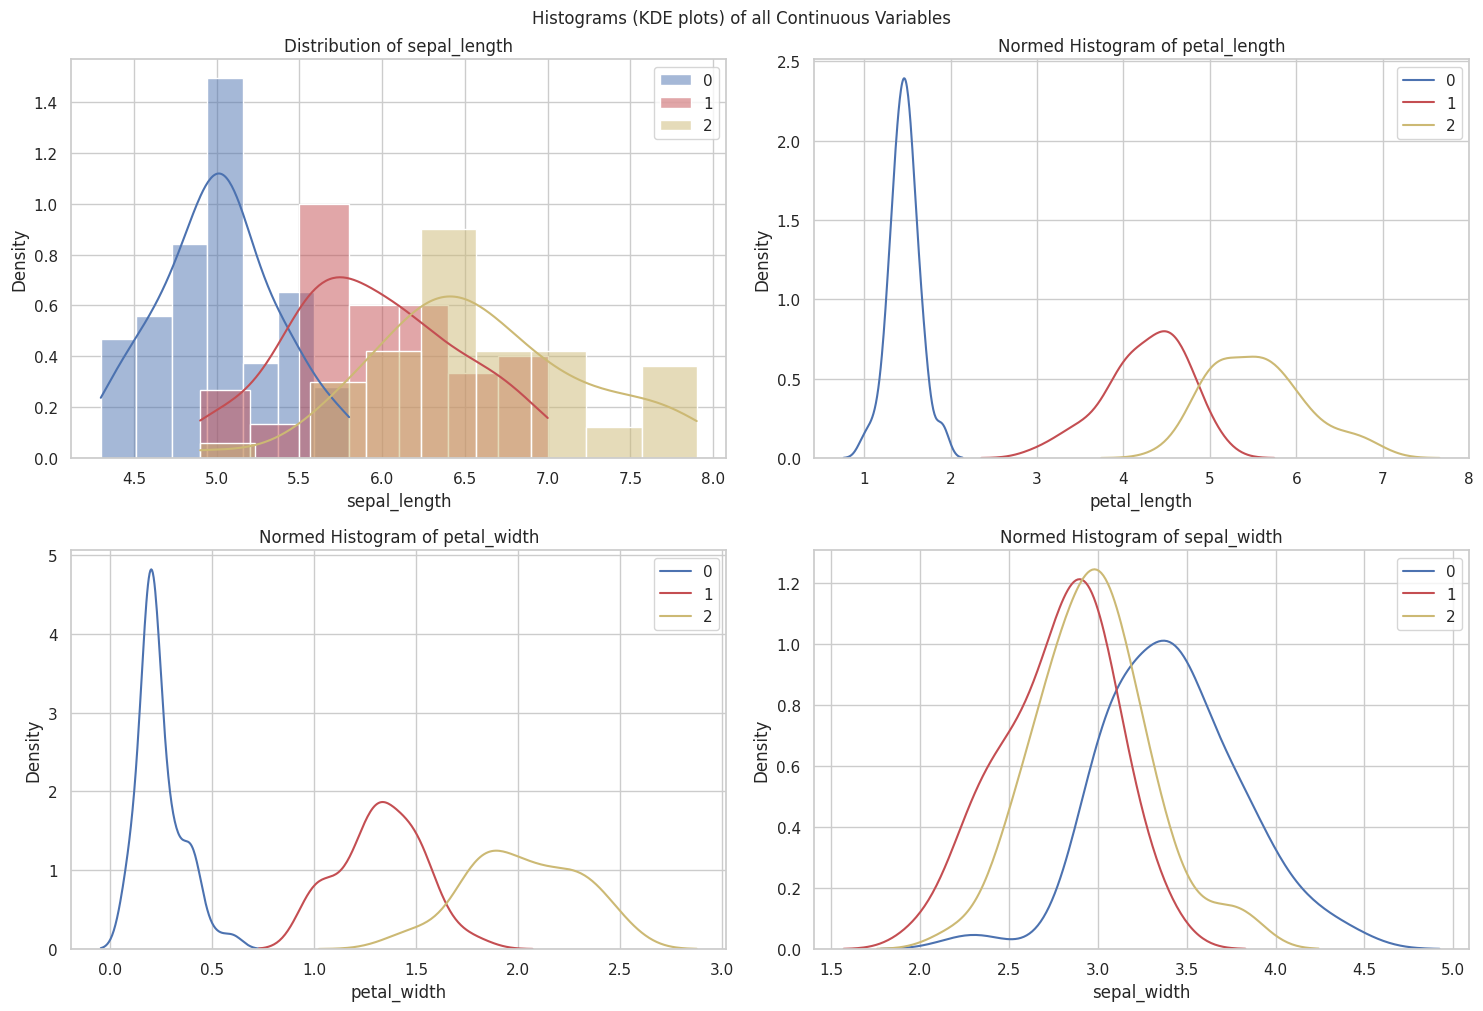

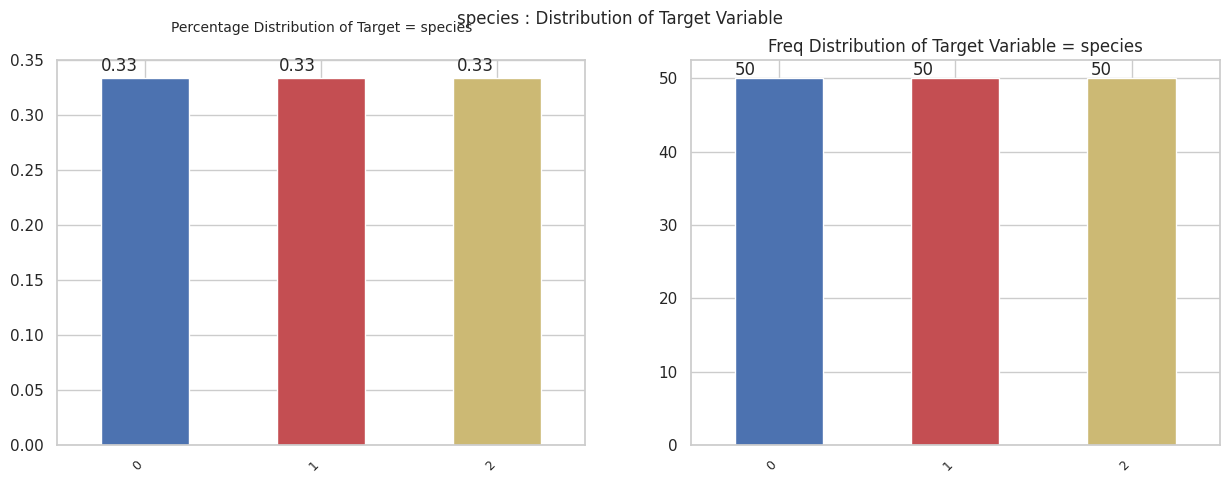

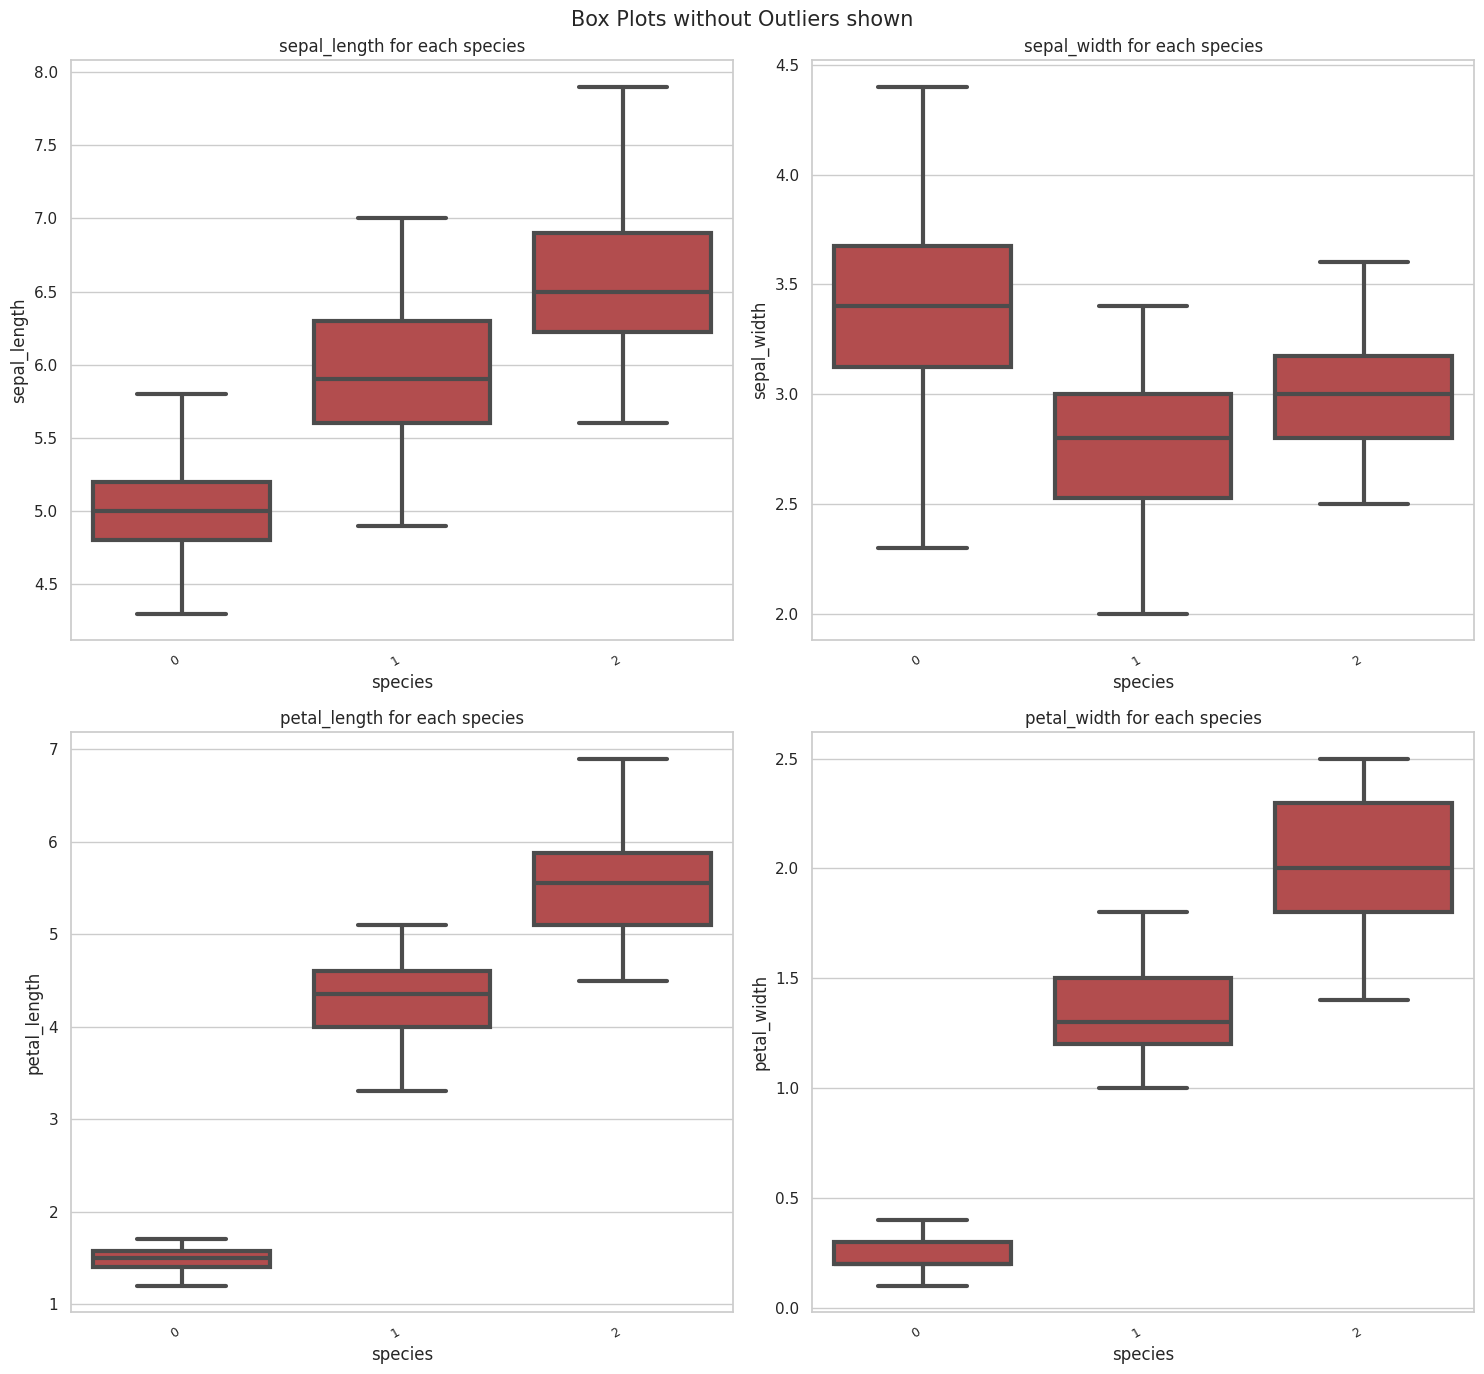

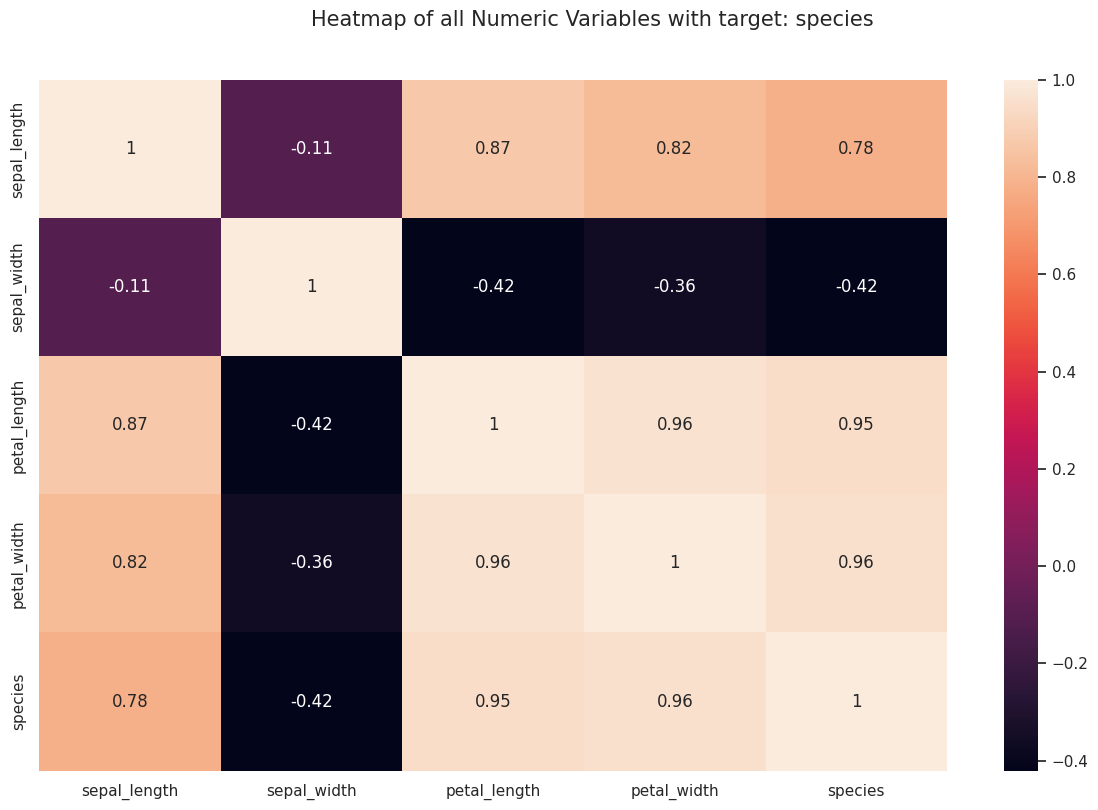

In [25]:
#visualize data in autoviz

from autoviz.AutoViz_Class import AutoViz_Class
from autoviz import FixDQ
%matplotlib inline



AV = AutoViz_Class()
target = 'species'

filename = iris


dft = AV.AutoViz(
    "",
    sep=",",
    depVar= target,
    dfte=iris,
    header=0,
    verbose=2,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=15000,
    max_cols_analyzed=30,
    save_plot_dir=None
)

In [30]:
X = iris.drop('species', axis=1)
y = iris['species']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [33]:
#using standardScaler to standardize

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## RandomForestClassifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score

clf2 = RandomForestClassifier()
clf2.fit(X_train_scaled,y_train)
#calculate accuracy

y_pred2=clf2.predict(X_test_scaled)
ac_3 = accuracy_score(y_test,y_pred2)
print(ac_3)

1.0


[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


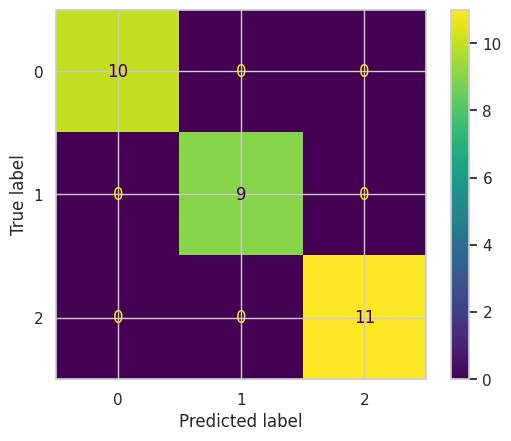

In [44]:
#Displaying confusion_Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test,y_pred2)
print(confusion_matrix(y_test,y_pred2))

## KNeighborsClassifier

In [45]:
from sklearn.neighbors import KNeighborsClassifier
clf1 = KNeighborsClassifier()
clf1.fit(X_train_scaled,y_train)
#calculate accuracy

y_pred1=clf1.predict(X_test_scaled)
ac_3 = accuracy_score(y_test,y_pred1)
print(ac_3)

1.0


[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


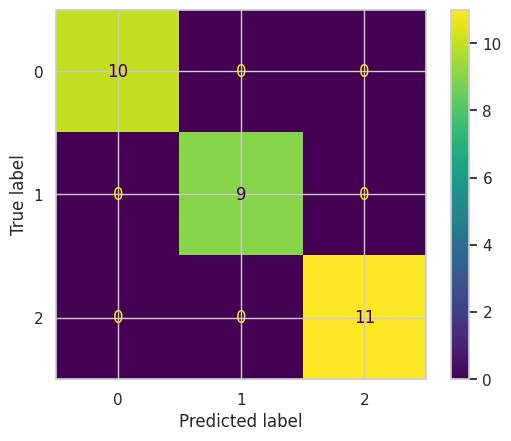

In [46]:
#Displaying confusion_Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test,y_pred1)
print(confusion_matrix(y_test,y_pred1))